In [32]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import time

In [33]:
ser = Service('../chrome_driver/chromedriver.exe')
driver = webdriver.Chrome(service = ser)

In [34]:
url = 'https://www.instagram.com/'
driver.get(url)
time.sleep(3)

In [ ]:
# 예제 5-3 인스타계정으로 로그인하기

email = '인스타계정입력해주세요'   ### 계정 정보 수정 필요
input_id = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[0]
input_id.clear()
input_id.send_keys(email)

password = '인스타비번입력해주세요' ### 비번 정보 수정 필요
input_pw = driver.find_elements_by_css_selector('input._2hvTZ.pexuQ.zyHYP')[1]
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()
time.sleep(3)

In [35]:
def insta_searching(word):
    url = 'https://www.instagram.com/explore/tags/' + word
    
    return(url)

In [36]:
word = '제주도맛집' 
url = insta_searching(word)
url

'https://www.instagram.com/explore/tags/제주도맛집'

In [37]:
word = '제주도맛집' 
url = insta_searching(word)
driver.get(url)
time.sleep(5)

In [41]:
from selenium.webdriver.common.by import By

def select_first(driver):
    # first = driver.find_element_by_css_selector('div._9AhH0')
    first = driver.find_element(By.CSS_SELECTOR, 'div._9AhH0')
    first.click()
    time.sleep(3)

select_first(driver)

In [43]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

soup

<html class="js logged-in client-root js-focus-visible sDN5V" lang="ko" style="--desktop-nav-height:60px;"><head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>#제주도맛집 해시태그 • Instagram 사진 및 동영상</title>
<meta content="noimageindex, noarchive" name="robots"/>
<meta content="default" name="apple-mobile-web-app-status-bar-style"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, viewport-fit=cover" id="viewport" name="viewport"/>
<link href="/data/manifest.json" rel="manifest"/>
<link as="style" crossorigin="anonymous" href="/static/bundles/es6/ConsumerUICommons.css/b3fdee5bd8e2.css" rel="preload" type="text/css"/>
<link as="style" crossorigin="anonymous" href="/static/bundles/es6/Consumer.css/13f5b6196ff4.css" rel="preload" type="text/css"/>
<link as="style" crossorigin="anonymous" href="/static/bundles/es6/TagPageCont

In [50]:
import unicodedata

content = soup.select('div.C4VMK > span')[0].text
content = unicodedata.normalize('NFC', content)

content

'(광고)인스타 광고 전문업체 플랜비컴퍼니입니다.현재 수백개의 업체 인스타 광고를 통한 매출향상!매장홍보, 오픈, 신메뉴 출시 등하루 1~5만 저렴한 가격으로 인스타 인기게시물로 홍보하세요.*아무리 맛있고, 좋은 제품, 이쁜카페가 있어도, 노출이되지 않고 사람들에게 알려지지 않으면 소용없습니다. 노출이 가장중요합니다.상담문의 010 5901 1470#연남동맛집 #제주도맛집 #중문맛집 #제주공항맛집 #제주공항근처맛집 #서귀포맛집 #연남동카페 #홍대맛집 #홍대카페 #경주맛집 #서면맛집 #전포동맛집 #부산맛집 #강남맛집 #인천맛집 #대구맛집 #동성로맛집 #이태원맛집 #포항맛집 #여수맛집 #속초맛집 #강릉맛집 #홍대입구역맛집 #제주흑돼지맛집 #부평맛집 #부천맛집 #기장맛집'

In [68]:
import re

tags = re.findall(r'#[^\s#,\\]+',content)
# tags = re.findall(r'#\w+',content)
tags

['#연남동맛집',
 '#제주도맛집',
 '#중문맛집',
 '#제주공항맛집',
 '#제주공항근처맛집',
 '#서귀포맛집',
 '#연남동카페',
 '#홍대맛집',
 '#홍대카페',
 '#경주맛집',
 '#서면맛집',
 '#전포동맛집',
 '#부산맛집',
 '#강남맛집',
 '#인천맛집',
 '#대구맛집',
 '#동성로맛집',
 '#이태원맛집',
 '#포항맛집',
 '#여수맛집',
 '#속초맛집',
 '#강릉맛집',
 '#홍대입구역맛집',
 '#제주흑돼지맛집',
 '#부평맛집',
 '#부천맛집',
 '#기장맛집']

In [74]:
date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
date

'2022-01-15'

In [82]:
like = soup.select('a.zV_Nj')[0].text
like
# like

'좋아요 286개'

In [85]:
like = soup.select('a.zV_Nj')[0]['href']
like

'/p/CYvLeoEhysW/liked_by/'

In [80]:
place = soup.select('a.O4GlU')
place = unicodedata.normalize('NFC', place)
place

[]

In [88]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ""
    
    
    try:
        tags = re.findall(r'#[^\s#,\\]+',content)
    except:
        tags = ""
        
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    
    try:
        like = soup.select('a.zV_Nj > span')[0].text
    except:
        like = 0
    
    try:
        place = soup.select('a.O4GlU')
        place = unicodedata.normalize('NFC', place)
    except:
        place = ""
    
    
    data = [content, date, like, place, tags]
    
    return(data)
    

In [89]:
mylist = get_content(driver)
mylist

['(광고)인스타 광고 전문업체 플랜비컴퍼니입니다.현재 수백개의 업체 인스타 광고를 통한 매출향상!매장홍보, 오픈, 신메뉴 출시 등하루 1~5만 저렴한 가격으로 인스타 인기게시물로 홍보하세요.*아무리 맛있고, 좋은 제품, 이쁜카페가 있어도, 노출이되지 않고 사람들에게 알려지지 않으면 소용없습니다. 노출이 가장중요합니다.상담문의 010 5901 1470#연남동맛집 #제주도맛집 #중문맛집 #제주공항맛집 #제주공항근처맛집 #서귀포맛집 #연남동카페 #홍대맛집 #홍대카페 #경주맛집 #서면맛집 #전포동맛집 #부산맛집 #강남맛집 #인천맛집 #대구맛집 #동성로맛집 #이태원맛집 #포항맛집 #여수맛집 #속초맛집 #강릉맛집 #홍대입구역맛집 #제주흑돼지맛집 #부평맛집 #부천맛집 #기장맛집',
 '2022-01-15',
 '286',
 '',
 ['#연남동맛집',
  '#제주도맛집',
  '#중문맛집',
  '#제주공항맛집',
  '#제주공항근처맛집',
  '#서귀포맛집',
  '#연남동카페',
  '#홍대맛집',
  '#홍대카페',
  '#경주맛집',
  '#서면맛집',
  '#전포동맛집',
  '#부산맛집',
  '#강남맛집',
  '#인천맛집',
  '#대구맛집',
  '#동성로맛집',
  '#이태원맛집',
  '#포항맛집',
  '#여수맛집',
  '#속초맛집',
  '#강릉맛집',
  '#홍대입구역맛집',
  '#제주흑돼지맛집',
  '#부평맛집',
  '#부천맛집',
  '#기장맛집']]

In [100]:
def move_next(driver):
    
    right = driver.find_element(By.CSS_SELECTOR, 'div.l8mY4.feth3')
    right.click()
    time.sleep(3)
    
move_next(driver)

In [102]:
# driver = webdriver.Chrome(service = ser)

# driver.get('https://www.instargram.com')
# time.sleep(2)

def insta_crawling(word, n):
    url = insta_searching(word)
    
    driver.get(url)
    time.sleep(5)
    
    select_first(driver)
    time.sleep(5)
    
    
#     target = n
    results = []
    
    for i in range(n):
        try:
            data = get_content(driver)
            results.append(data)
            move_next(driver)
            
        except:
            time.sleep(2)
            move_next(driver)
            
    return(results)

In [103]:
result_1 = insta_crawling('제주도맛집', 20)

In [105]:
len(result_1)
result_1[0]

['제주 산방산 가기전 먹방투어출출할 때 유명한 #천지연숯화로구이 에서!!흑돼지오겹살 + 소고기꽃갈비진짜 잘나옴!맛도 좋고 사장님도 친절해서한번만 갔다온 사람은 없는 그 곳!천지연숯화로구이064-794-6243#천지연숯화로구이#산방산맛집#송악산맛집#산방산흑돼지맛집#제주흑돼지맛집#제주용머리해안맛집#안덕맛집#오설록맛집#산방산흑돼지#오설록흑돼지맛집#모슬포맛집#서귀포흑돼지#신화월드맛집#중문관광단지흑돼지#제주도맛집#제주가볼만한곳',
 '2022-01-17',
 '1,596',
 '',
 ['#천지연숯화로구이',
  '#천지연숯화로구이',
  '#산방산맛집',
  '#송악산맛집',
  '#산방산흑돼지맛집',
  '#제주흑돼지맛집',
  '#제주용머리해안맛집',
  '#안덕맛집',
  '#오설록맛집',
  '#산방산흑돼지',
  '#오설록흑돼지맛집',
  '#모슬포맛집',
  '#서귀포흑돼지',
  '#신화월드맛집',
  '#중문관광단지흑돼지',
  '#제주도맛집',
  '#제주가볼만한곳']]

In [108]:
result_df = pd.DataFrame(result_1)
result_df.columns = ['content','date','like','place','tags']

result_df.head()


,content,date,like,place,tags
0,제주 산방산 가기전 먹방투어출출할 때 유명한 #천지연숯화로구이 에서!!흑돼지오겹살 ...,2022-01-17,"1,596",,"[#천지연숯화로구이, #천지연숯화로구이, #산방산맛집, #송악산맛집, #산방산흑돼지..."
1,"(광고)밥묵자~! 김대희가 밥두그릇 순삭했다는 그 맛집!""색달식당""'갈치가 이렇게 ...",2022-01-16,0,,"[#제주도맛집, #제주갈치조림, #마노르블랑, #서귀포호텔, #제주도여행]"
2,<광고>#제주분식 https://jejubunsig.modoo.at/ 📌제주시 귀아...,2022-01-15,0,,"[#제주분식, #제주분식, #모당모당, #돔베라면돔베김밥, #제주맛집, #제주도맛집..."
3,22.01.17부터 천국의 계단 사시미&제주 갈치초밥 신메뉴 개시!! ✅한라봉스시 ...,2022-01-17,335,,"[#애월맛집, #제주도맛집, #제주맛집, #애월스시, #제주스시, #애월횟집, #제..."
4,.⠀푸릇푸릇한 감귤나무 밭 한가운데그 곳에서 지글지글 흑돼지를 굽고 있어요.⠀#월정...,2022-01-17,206,,[#월정리갈비밥]


In [110]:
jeju_insta_df = pd.DataFrame()

f_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoGwanGwang.xlsx', 
          '1_crawling_jejuMatJip.xlsx', '1_crawling_jejuYeoHang.xlsx']

for fname in f_list:
    fpath = './files/' + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)
    

In [112]:
jeju_insta_df.shape

(12780, 5)

In [113]:
jeju_insta_df.drop_duplicates(subset = ['content'], inplace = True)
jeju_insta_df.shape

(8369, 5)

In [ ]:
jeju_insta_df.to_excel('./files/1_crawling_raw.xlsx', index = False)

In [115]:
raw_total = jeju_insta_df.copy()

In [119]:
raw_total.columns
raw_total['tags']

0       ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
1       ['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo...
2       ['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주...
3       ['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛...
4                                                      []
                              ...                        
1702    ['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그...
1703    ['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'...
1705                           ['#사진좀찍으시는님덕에건져또', '#이순간']
1706                                                   []
1707                            ['#HappyNewYearEveryone']
Name: tags, Length: 8369, dtype: object

In [165]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

raw_total['tags'][1].str[2:-2]

1    #함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo',...
1    #제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#제주...
1    #함스타푸드_속초청초수물회✔️속초핫플레이스해삼전복물회✔️40.000₩.대한민국', ...
1    #동백군락지', '#제주위미동백군락지', '#제주', '#위미', '#동백', '#...
Name: tags, dtype: object

In [150]:
from collections import Counter

tag_counts = Counter(tags_total)
tag_counts
# pd.Series(tags_total).value_counts()

Counter({'#제주분식': 76,
         '#제주맛집': 3412,
         '#제주도맛집': 3149,
         '#제주맛집추천': 675,
         '#제주도맛집추천': 187,
         '#제주도': 2053,
         '#용두암': 18,
         '#신제주맛집': 157,
         '#연동맛집': 58,
         '#제주연동맛집': 14,
         '#애월맛집': 373,
         '#연동제주분식': 30,
         '#제주공항근처맛집': 231,
         '#제주공항맛집': 207,
         '#돔베김밥': 16,
         '#전복김밥': 84,
         '#제주돈까스': 14,
         '#jeju': 749,
         '#제주도가볼만한곳': 1014,
         '#함덕맛집': 97,
         '#제주도카페투어': 46,
         '#제주일상': 398,
         '#함덕': 54,
         '#jejudo': 191,
         '#함덕맛집무거버거짱': 15,
         '#일상': 701,
         '#제주살이': 480,
         '#제주도살이': 4,
         '#함덕해수욕장': 75,
         '#함덕카페': 28,
         '#제주카페': 600,
         '#제주도카페': 258,
         '#제주도민': 570,
         '#제주도민맛집': 477,
         '#제주도여행': 1454,
         '#동문시장': 46,
         '#제주동문시장': 35,
         '#제주도기념품': 50,
         '#제주기념품': 125,
         '#제주스는완벽': 12,
         '#제주도주스': 10,
         '#제주도한라봉주스': 10,
      

#제주맛집                    3412
#제주도맛집                   3149
#제주여행                    3020
#제주관광                    2827
#제주도                     2053
                         ... 
#천수관음무                      1
#제주도립김창열미술관                 1
#물방울과얼룩전                    1
#김창열화백                      1
#HappyNewYearEveryone       1
Length: 19413, dtype: int64

In [152]:
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397)]

In [158]:
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹',
'#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔', '#제주속눈썹',
            '#제주일상', '#여행스타그램', '#눈썹문신', '#카멜리아힐',
            '#daily', '#제주반영구', '#여행']

tag_total_selected = []

for tag in tags_total:
    if not tag in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_total_selected = Counter(tag_total_selected)
tag_total_selected.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#제주도관광', 440),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#중문맛집', 404),
 ('#먹스타그램', 395),
 ('#서귀포반영구', 395),
 ('#서귀포속눈썹', 395),
 ('#제주남자눈썹문신', 395),
 ('#서귀포자연눈썹', 395),
 ('#서귀포남자눈썹문신', 395),
 ('#중문흑돼지맛집', 377),
 ('#애월맛집', 373),
 ('#제주메이크업', 358),
 ('#가족여행', 356),
 ('#제주도여행코스', 350),
 ('#jejuisland', 343),
 ('#성산맛집', 316)]

In [160]:
import matplotlib.pyplot as plt
from matplotlib import rc
import sys
import seaborn as sns

rc('font', family = "malgun gothic")

In [173]:
tag_count_df = pd.DataFrame(tag_total_selected.most_common(50))
tag_count_df.columns =['tags', 'counts']
tag_count_df.head()

##  blank 지우기
tag_count_df['tags'].replace('', None, inplace = True)
tag_count_df['tags']
tag_count_df.dropna(subset = ['tags'], inplace = True)

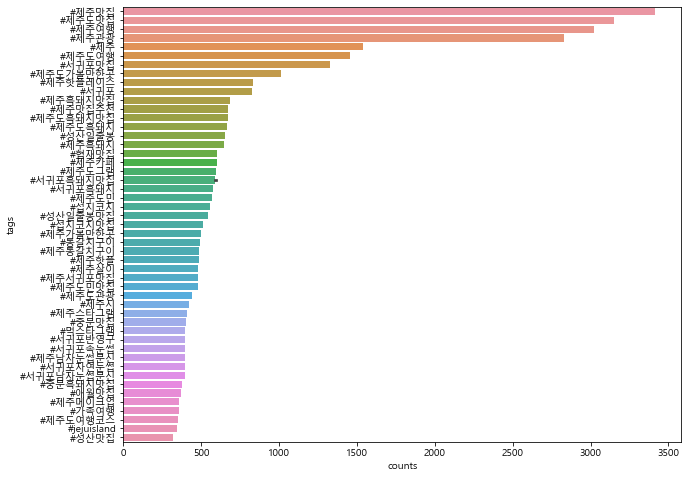

In [175]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'counts', y = 'tags',
           data = tag_count_df)
plt.show()

In [5]:
! pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Running setup.py clean for wordcloud
Failed to build wordcloud
    Running setup.py install for wordcloud: started
    Running setup.py install for wordcloud: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\envs\nbkim\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\student\\AppData\\Local\\Temp\\pip-install-_bm5nwwl\\wordcloud_0a34991ccb5f43138b2efa1fc3707c71\\setup.py'"'"'; __file__='"'"'C:\\Users\\student\\AppData\\Local\\Temp\\pip-install-_bm5nwwl\\wordcloud_0a34991ccb5f43138b2efa1fc3707c71\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\student\AppData\Local\Temp\pip-wheel-z3k9lily'
       cwd: C:\Users\student\AppData\Local\Temp\pip-install-_bm5nwwl\wordcloud_0a34991ccb5f43138b2efa1fc3707c71\
  Complete output (20 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating buil

In [4]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [9]:
import pandas as pd

# raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


In [13]:
location_counts = raw_total['place'].value_counts()
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()


,place
Jeju,271
Jeju-do,179
Jungle Book by Alice,108
Seogwipo,66
제주도 크리스마스 박물관,59


In [16]:
locations = list(location_counts_df.index)
locations

['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '할로비치',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen',
 '1100고지',
 'Nimome',
 '월정리해변',
 '고집돌우럭중문점',
 '석부작박물관',
 '제주도 애월읍',
 '알뜨르 비행장',
 '카멜리아 힐',
 '제주레포츠랜드',
 '밥깡패',
 '제주 함덕 서우봉 해변',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 '제주고궁한복카페 jeju gogung hanbok studio',
 '위미동백나무군락지',
 '제주신화월드 Jeju Shinhwa World',
 'Woljeongri Beach',
 '협재해변 Beach',
 '연동 바오젠 거리',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '고래배꼽',
 '제주 성산 신산포구자연산횟집 회포장',
 '새별오름',
 '용머리해안',
 '용눈이오름',
 '캔디원',
 '사려니숲길',
 '하이엔드 제주',
 '제주빅볼랜드',
 '서귀포 느영나영 게스트하우스',
 '휴애리 자연생활공원',
 '옹포리',
 '삼무공원',
 '마마뜰',
 '제주어린왕자게스트하우스',
 '위미동백나무군락',
 '제주커피박물관 Baum',
 'Jeju Aewol',
 '한라산',
 '위미2리 동백군락지',
 'Jeju Island 제주특별자치도 济州道',
 '광치기해변',
 '서우봉',
 '제주해남',
 '한라산 (漢拏山, Hallasan)',
 '카페한라산',
 '성이시돌목장',
 '제주 송악산',
 '옹포별장가든',
 '월정리카페콧수염',
 '牛岛 Udo Island 우도',
 '곽지해수욕장',
 '카페브리프',
 '아줄레주',
 '에코랜드',
 '산굼부리',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 'Terarosa - 테라로사',